In [5]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
PATH = "chennai_house_price.csv"
dataset = pd.read_csv(PATH)
important_columns = ["price", "area", "status", "bhk", "bathroom", "age"]
dataset = dataset[important_columns].copy()
dataset["status"] = dataset["status"].replace({"Ready to move": 1, "Under Construction": 0}) # Делаем статусы целочисленными
dataset.dropna(inplace=True) # Удалили строки со значением Nan
dataset.reset_index(drop=True, inplace=True) # Пронумеровал id заново
dataset.rename(columns={"bhk": "bedrooms"}, inplace=True) # Изменить название столбца
dataset['price'] = dataset['price'].astype(int)
dataset = dataset.drop([
    'area',
    'bathroom'
], axis=1)

dataset.head(10)

,price,status,bedrooms,age
0,49,1,2,3.0
1,42,0,2,0.0
2,188,0,3,0.0
3,240,1,3,1.0
4,113,1,4,5.0
5,50,1,2,1.0
6,57,0,2,0.0
7,42,0,2,0.0
8,50,1,2,1.0
9,47,0,2,0.0


<Axes: >

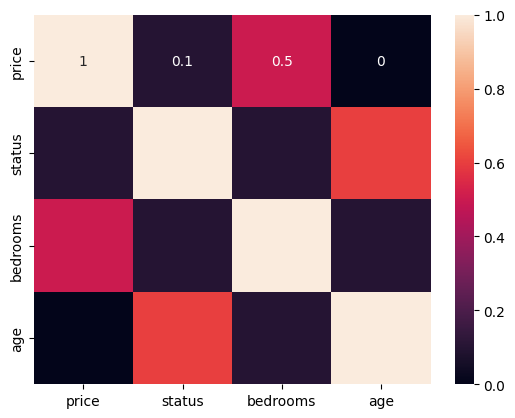

In [8]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [9]:
data = dataset[["age", "bedrooms"]]
output = (dataset['price'] > 60)

train_input, test_input, train_output, test_output = train_test_split(data, output, test_size=0.4)


<Axes: >

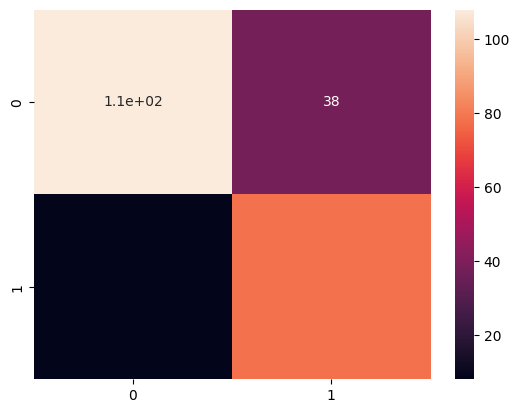

In [10]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
    confusion_matrix,
    annot=True,
)

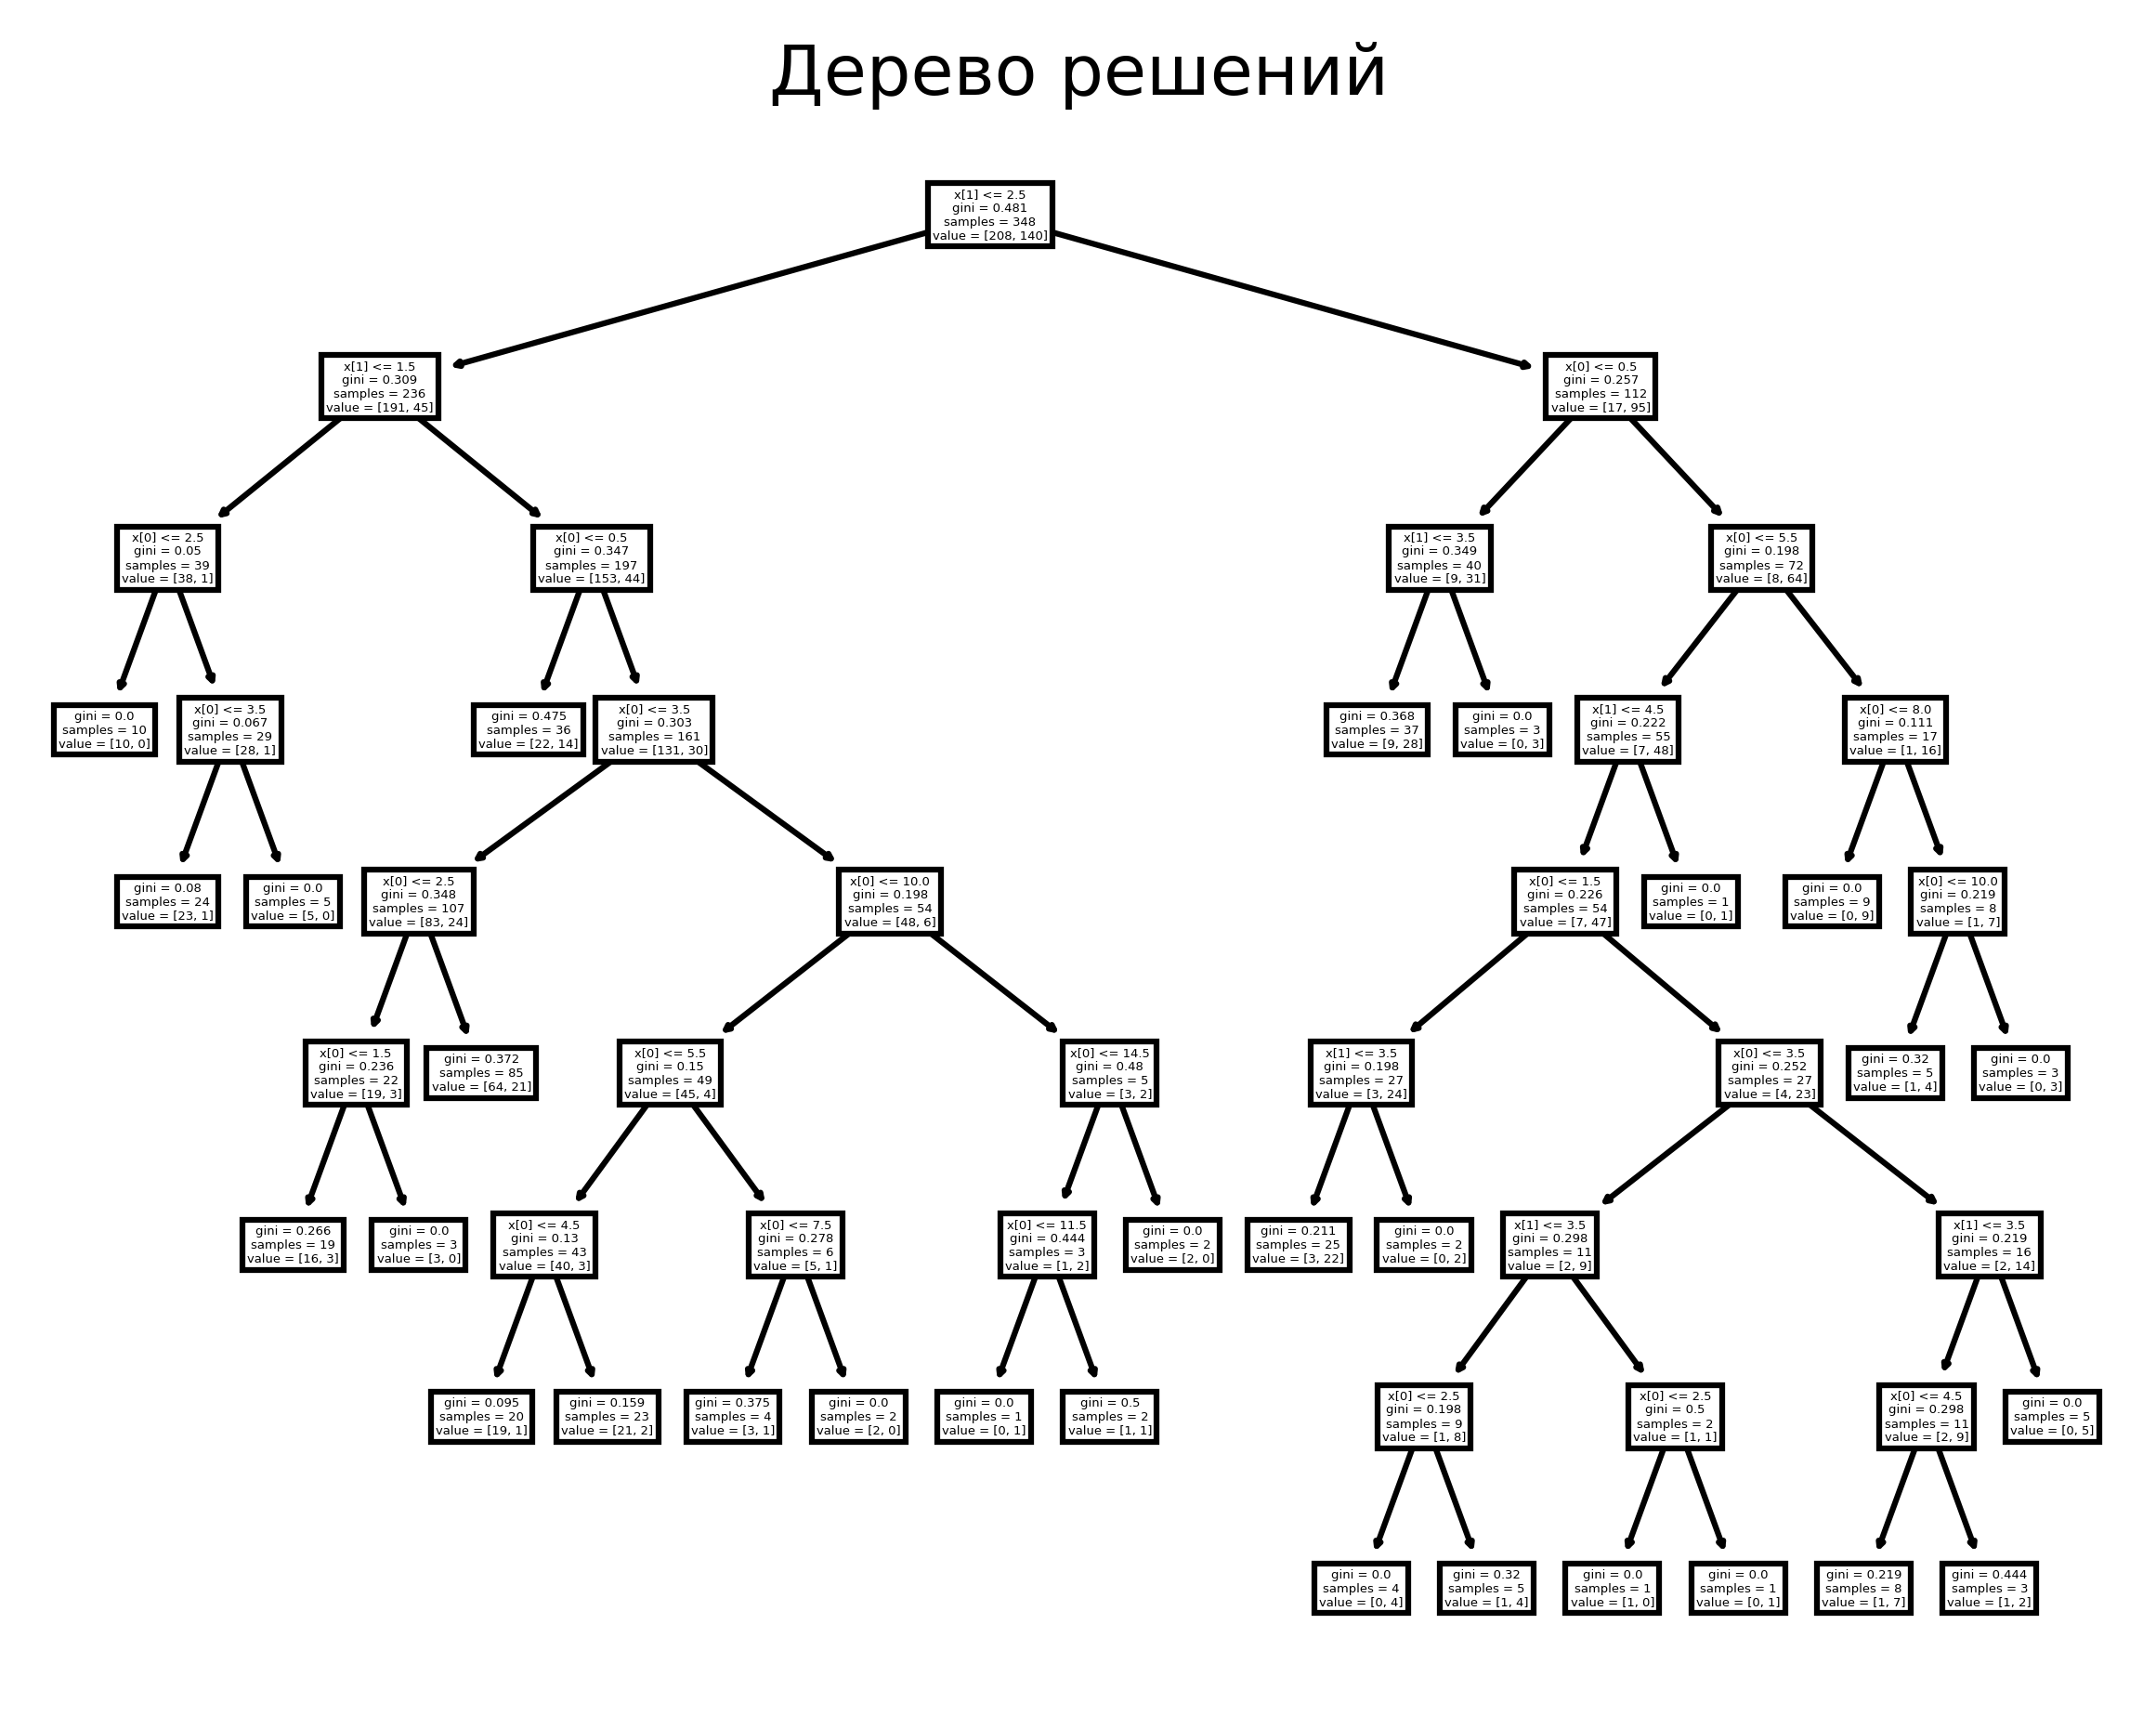

In [11]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")
plt.savefig("Рис 10.jpg")